# Employee Attrition Modelling

In [50]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Import the data 
real_df = pd.read_csv('employee_attrition.csv')

In [53]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:
real_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [55]:
pd.set_option('display.max_columns',None)

In [56]:
real_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [57]:
#Drop EmployeeNumber as its only ID
df = real_df.drop(columns=['EmployeeNumber'], axis=1)

In [58]:
#Create target column
df['Target'] = np.where(df['Attrition']=='Yes', 1, 0)

In [59]:
#Drop Attrition column
df.drop(['Attrition'], axis=1, inplace=True)

In [60]:
#Defining Target and Predictor Features
X = df.drop(['Target'], axis=1)
Y = df['Target']

In [61]:
#Find the attrition rate (No. of attrition/total no of employee) 
#Simply it is mean
Y.mean()

0.16122448979591836

In [62]:
#Separate numerical and categorical feature
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [63]:
# FInd the unique value count of each feature
def unique_val(col):
    return col.value_counts().count()

df_val_count = pd.DataFrame(num.apply(lambda x: unique_val(x)))
df_val_count.columns = ['Feature Level']

In [64]:
df_val_count
#You can drop EmployeeCount StandardHours

,Feature Level
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobLevel,5
JobSatisfaction,4


In [65]:
#Numeric Column less than 15 unique level treated as categorical

cat_feature = df_val_count.loc[df_val_count['Feature Level'] <= 15]
cat_list = cat_feature.index
cat = num.loc[:,cat_list]
cat

,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,2,1,2,3,2,4,8,11,3,1,80,0,0,1
1,1,1,3,2,2,2,1,23,4,4,80,1,3,3
2,2,1,4,2,1,3,6,15,3,2,80,0,3,3
3,4,1,4,3,1,3,1,11,3,3,80,0,3,3
4,1,1,1,3,1,2,9,12,3,4,80,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,1,3,4,2,4,4,17,3,3,80,1,3,3
1466,1,1,4,2,3,1,4,15,3,1,80,1,5,3
1467,3,1,2,4,2,2,1,20,4,2,80,1,0,3
1468,3,1,4,2,2,2,2,14,3,4,80,0,3,2


In [66]:
#Numeric Column more than 15 unique level treated as numerical
num_features = df_val_count.loc[df_val_count['Feature Level'] > 15]
num_list = num_features.index
num = num.loc[:,num_list]
num

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,6,4,0,5
1,49,279,8,61,5130,24907,10,10,7,1,7
2,37,1373,2,92,2090,2396,7,0,0,0,0
3,33,1392,3,56,2909,23159,8,8,7,3,0
4,27,591,2,40,3468,16632,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,17,5,2,0,3
1466,39,613,6,42,9991,21457,9,7,7,1,7
1467,27,155,4,87,6142,5174,6,6,2,0,3
1468,49,1023,2,63,5390,13243,17,9,6,0,8


In [67]:
#concatenate char Dataframe and cat dataframe
char = pd.concat([char, cat], axis=1, join='inner')
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,1,2,3,2,4,8,11,3,1,80,0,0,1
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,1,3,2,2,2,1,23,4,4,80,1,3,3
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,1,4,2,1,3,6,15,3,2,80,0,3,3
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,1,4,3,1,3,1,11,3,3,80,0,3,3
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,1,3,1,2,9,12,3,4,80,1,3,3


In [68]:
# Outliers analysis for numerical features
num.describe(percentiles=[0.01, 0.05, .10, 0.25, 0.50,0.75, 0.90, 0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000,7.000000,3.000000,7.000000


In [69]:
#Outlier capping 
def capping(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return x

#Parameters:
#lower : Minimum threshold value. All values below this threshold 
#        will be set to it, mean it set to 1% quantile.
#upper : Maximum threshold value. All values above this threshold 
#        will be set to it, mean it set to 99% quantile.

In [70]:
num = num.apply(lambda x: capping(x))

In [71]:
num.describe(percentiles=[0.01, 0.05, .10, 0.25, 0.50,0.75, 0.90, 0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.918810,802.482993,9.192517,65.891156,6503.407177,14312.602483,11.268707,6.980272,4.214966,2.178912,4.102721
std,9.099146,403.260237,8.106864,20.329428,4700.530849,7112.052810,7.710507,6.004901,3.576459,3.188426,3.503717
min,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1389.732600,2325.711700,1.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000,7.000000,3.000000,7.000000


In [72]:
#Calculate the percentage of missing values
num.isnull().mean() #Formula = num.isnull().sum()/num.isnull().count() 

Age                        0.0
DailyRate                  0.0
DistanceFromHome           0.0
HourlyRate                 0.0
MonthlyIncome              0.0
MonthlyRate                0.0
TotalWorkingYears          0.0
YearsAtCompany             0.0
YearsInCurrentRole         0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
dtype: float64

In [73]:
char.isnull().mean()

BusinessTravel              0.0
Department                  0.0
EducationField              0.0
Gender                      0.0
JobRole                     0.0
MaritalStatus               0.0
Over18                      0.0
OverTime                    0.0
Education                   0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
JobInvolvement              0.0
JobLevel                    0.0
JobSatisfaction             0.0
NumCompaniesWorked          0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
dtype: float64

### Feature Selection-Numerical Features

### A. Remove Features with zero variance (Univariate Analysis)

In [74]:
from sklearn.feature_selection import VarianceThreshold
varsel = VarianceThreshold(threshold=0)
varsel.fit_transform(num)
col = varsel.get_support(indices=True) 
# Get columns to keep and create new dataframe with those only
num1 = num.iloc[:,col]
num1.iloc[0]

Age                           41.0
DailyRate                   1102.0
DistanceFromHome               1.0
HourlyRate                    94.0
MonthlyIncome               5993.0
MonthlyRate                19479.0
TotalWorkingYears              8.0
YearsAtCompany                 6.0
YearsInCurrentRole             4.0
YearsSinceLastPromotion        0.0
YearsWithCurrManager           5.0
Name: 0, dtype: float64

### A. Bi Variate Analysis (Feature Discretization)

In [75]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', 
                            strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num), 
                          index=num.index, 
                          columns=num.columns).add_suffix('_Rank')
#All the numeric column is converted 
#   into ranking from 1 to 10, 10 bins are created 
#All numeric values are converted to discrete
#All the columns are rank version of contineous values

In [76]:
num_binned.head()

,Age_Rank,DailyRate_Rank,DistanceFromHome_Rank,HourlyRate_Rank,MonthlyIncome_Rank,MonthlyRate_Rank,TotalWorkingYears_Rank,YearsAtCompany_Rank,YearsInCurrentRole_Rank,YearsSinceLastPromotion_Rank,YearsWithCurrManager_Rank
0,7.0,7.0,0.0,9.0,6.0,7.0,4.0,4.0,4.0,0.0,4.0
1,8.0,1.0,4.0,4.0,5.0,9.0,5.0,7.0,5.0,1.0,5.0
2,5.0,9.0,1.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,3.0,9.0,2.0,3.0,2.0,8.0,4.0,5.0,5.0,2.0,0.0
4,1.0,3.0,1.0,1.0,3.0,5.0,2.0,2.0,2.0,2.0,2.0


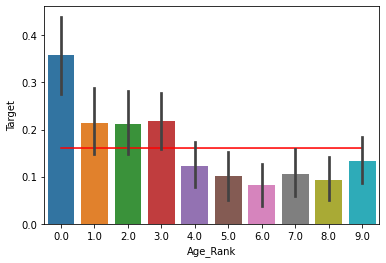

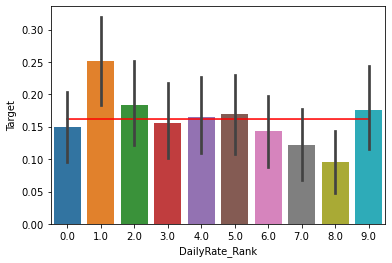

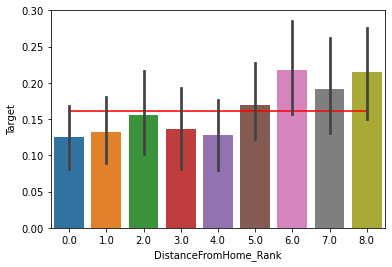

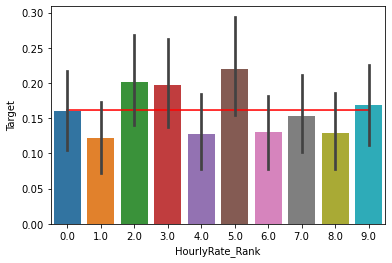

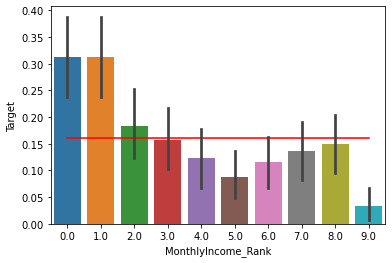

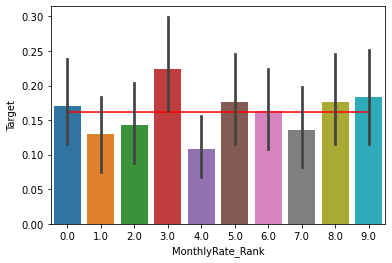

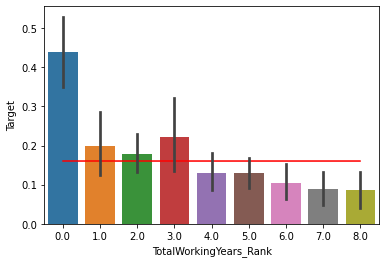

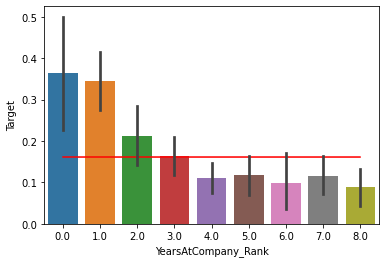

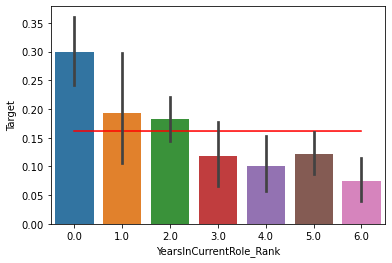

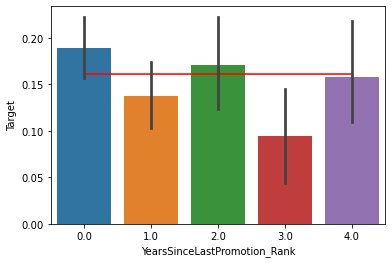

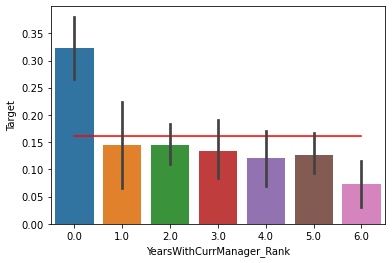

In [77]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average 
# and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to 
#discriminate the event from non event making it a good predictor

from numpy import mean
X_bin_combined = pd.concat([num_binned,Y],axis=1, join='inner')
for col in num_binned.columns:
    plt.figure()
    sns.lineplot(x=col, y=Y.mean(), color='red', data=X_bin_combined)
    sns.barplot(x=col, y='Target', data=X_bin_combined, estimator=mean)
plt.show()

#Conclusion
#1. Higher age more chance of attrition
#2. Daily rate is not giving any insight same as hourly rate
#3. Lower monthly income chance of more attrition
#4. Distancefromhome little bit affecting attrition
#5. Totalworking years is less, chance of attrition is more
#6. Yearsincelastpromotion does not make any sense to the attrition
#7. Monthly rate is not making contribution in attrition

In [78]:
#Drop 'DailyRate', 'HourlyRate','MonthlyRate', 'YearsSinceLastPromotion'
num1.drop(columns=['DailyRate', 'HourlyRate',
                   'MonthlyRate', 
                   'YearsSinceLastPromotion'], inplace=True, axis=1)
num1

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41.0,1,5993.0,8,6,4,5
1,49.0,8,5130.0,10,10,7,7
2,37.0,2,2090.0,7,0,0,0
3,33.0,3,2909.0,8,8,7,0
4,27.0,2,3468.0,6,2,2,2
...,...,...,...,...,...,...,...
1465,36.0,23,2571.0,17,5,2,3
1466,39.0,6,9991.0,9,7,7,7
1467,27.0,4,6142.0,6,6,2,3
1468,49.0,2,5390.0,17,9,6,8


In [79]:
num1.dtypes

Age                     float64
DistanceFromHome          int64
MonthlyIncome           float64
TotalWorkingYears         int64
YearsAtCompany            int64
YearsInCurrentRole        int64
YearsWithCurrManager      int64
dtype: object

In [80]:
#Select best 4 features using k best
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4)
selector.fit_transform(num1,Y)
cols = selector.get_support(indices=True)
select_features_df_num = num1.iloc[:,cols]

In [81]:
select_features_df_num.columns
#All the column ['MonthlyIncome', 'TotalWorkingYears', 
# 'YearsAtCompany', 'YearsInCurrentRole'] 
#given by SelectkBest is having good slop of attrition.


Index(['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole'],
      dtype='object')

### Feature Selection-Categorical Features

In [82]:
#We can not check zero variance for categorical column
#We will find the unique level of each column and if unique level 
# are less than 1 then drop those column/feature
def unique_level(x):
    x = x.value_counts().count()
    return x
char_unique_level = pd.DataFrame(char.apply(lambda x: unique_level(x)))
char_unique_level    

,0
BusinessTravel,3
Department,3
EducationField,6
Gender,2
JobRole,9
MaritalStatus,3
Over18,1
OverTime,2
Education,5
EmployeeCount,1


In [83]:
#Drop feature having unique level <1

In [84]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))
char_unique_levels.columns = ['feature levels']

In [85]:
char_unique_levels

,feature levels
BusinessTravel,3
Department,3
EducationField,6
Gender,2
JobRole,9
MaritalStatus,3
Over18,1
OverTime,2
Education,5
EmployeeCount,1


In [86]:
slice1 = char_unique_levels.loc[char_unique_levels['feature levels'] > 1]
cat_list = slice1.index
char = char.loc[:,cat_list]

### Bivariate Analysis

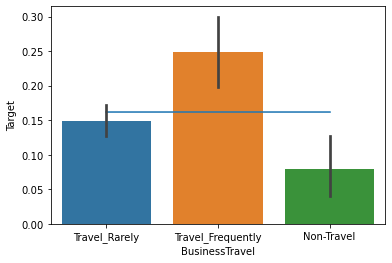

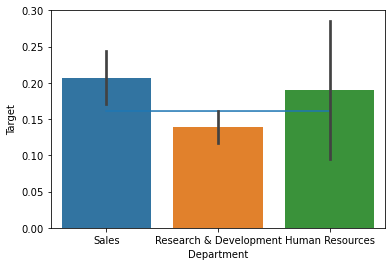

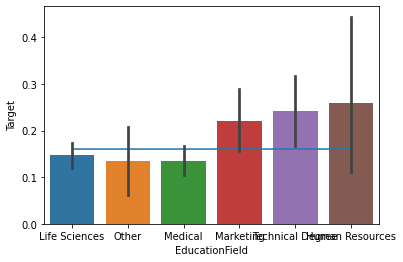

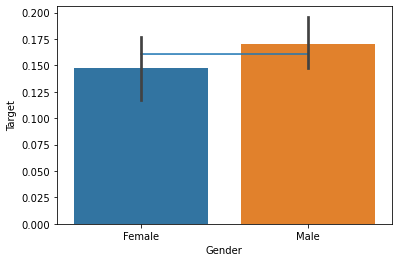

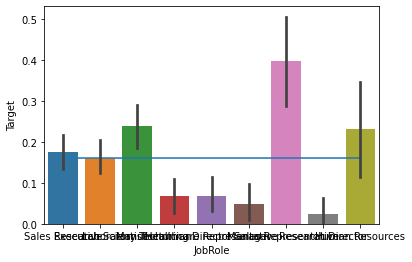

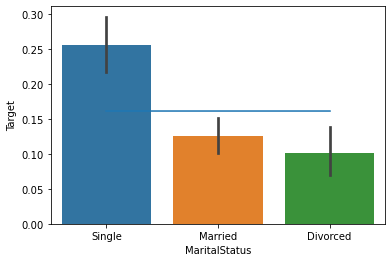

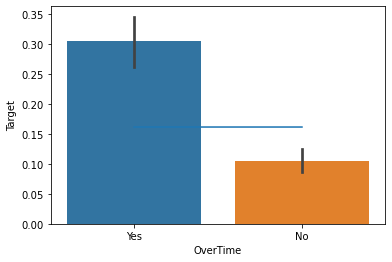

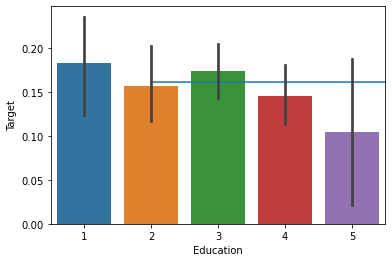

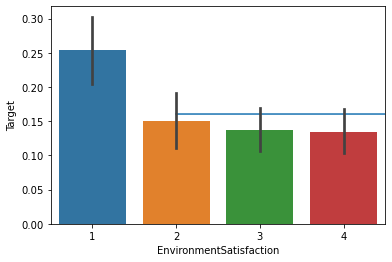

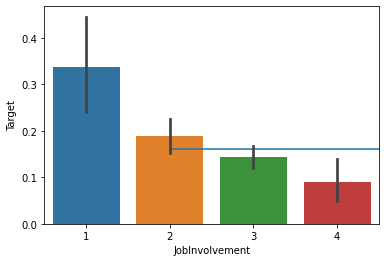

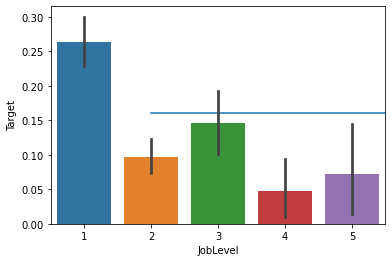

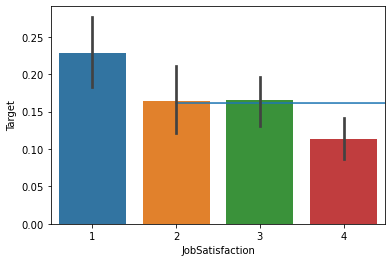

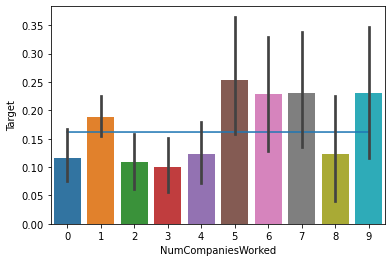

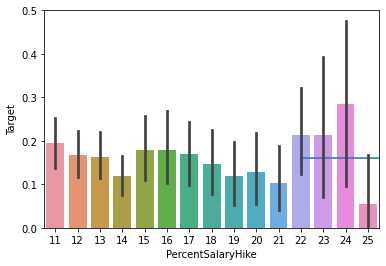

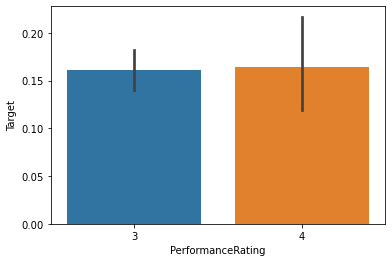

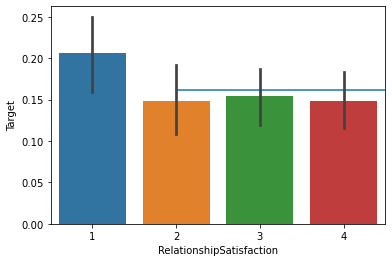

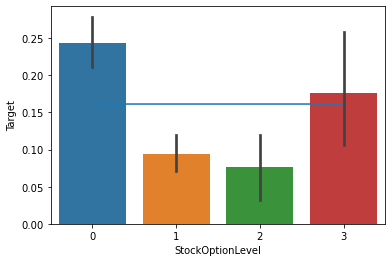

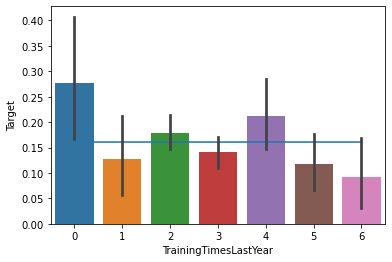

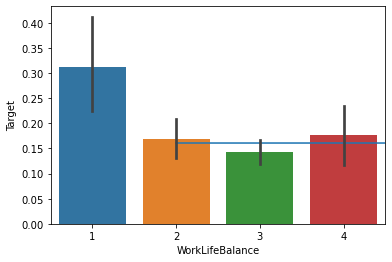

In [87]:
X_char_merge = pd.concat([Y, char], join='inner', axis=1)
for col in char.columns:
    plt.figure()
    sns.lineplot(x=col, y=Y.mean(), data=X_char_merge, estimator=mean)
    sns.barplot(x=col, y=Y, data=X_char_merge, estimator=mean)
plt.show()
#Conclusion
#1.BusinessTravel is good feature, one cat is beating average 
# others are not same as Department
#2.Education is also good, some cat is having attrition some are not
#3.Gender is almost same
#4.Job role is also good feature, some are suceptable to attrition some arn't
#5.Marital status is also good, people who are single are likely to attrite
#6.Overtime is good
#7.Education is not that much good, every category is almost same
#8.Perfomance rating is almost same

In [88]:
#Drop columns = ['Gender','Education','PerformanceRating'] 
char.drop(columns=['Gender','Education','PerformanceRating'], 
          axis=1, inplace=True)

In [89]:
char.dtypes

BusinessTravel              object
Department                  object
EducationField              object
JobRole                     object
MaritalStatus               object
OverTime                    object
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
dtype: object

In [90]:
char['EnvironmentSatisfaction'] = char['EnvironmentSatisfaction'].astype('object')
char['JobInvolvement'] = char['JobInvolvement'].astype('object')
char['JobLevel'] = char['JobLevel'].astype('object')
char['JobSatisfaction'] = char['JobSatisfaction'].astype('object')
char['NumCompaniesWorked'] = char['NumCompaniesWorked'].astype('object')
char['PercentSalaryHike'] = char['PercentSalaryHike'].astype('object')
char['RelationshipSatisfaction'] = char['RelationshipSatisfaction'].astype('object')
char['StockOptionLevel'] = char['StockOptionLevel'].astype('object')
char['TrainingTimesLastYear'] = char['TrainingTimesLastYear'].astype('object')
char['WorkLifeBalance'] = char['WorkLifeBalance'].astype('object')

In [91]:
#1 Hot encoding
#Create dummy features with n-1 features from n features
#Why n-1, because last feature we can create by using other features
x_char_dum = pd.get_dummies(char, drop_first=True)
x_char_dum.shape

(1470, 71)

In [92]:
x_char_dum.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,PercentSalaryHike_12,PercentSalaryHike_13,PercentSalaryHike_14,PercentSalaryHike_15,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0


In [93]:
#Select best 60 features from k best
from sklearn.feature_selection import SelectKBest,chi2
selector = SelectKBest(chi2, k=60)
selector.fit_transform(x_char_dum, Y)
#get best column to create those feature only
cols = selector.get_support(indices=True)
select_features_df_char = x_char_dum.iloc[:,cols]
select_features_df_char.columns #Best 60

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'JobInvolvement_2', 'JobInvolvement_3',
       'JobInvolvement_4', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'JobSatisfaction_4', 'NumCompaniesWorked_1',
       'NumCompaniesWorked_2', 'NumCompaniesWorked_3', 'NumCompaniesWorked_4',
       'NumCompaniesWorked_5', 'NumCompaniesWo

In [94]:
#Create main set of features for model development using 
#select_features_df_char, select_features_df_char
x_all = pd.concat([select_features_df_char, 
                   select_features_df_num], axis=1, join='inner')

### Train Test Split

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x_all, Y, test_size=0.3, random_state=2)
#Selected random state 2, my sample should 
#be the good representation of population
#Randome state, its a seed number

In [96]:
print(f'Shape of training data:{X_train.shape}')
print(f'Shape of testing data:{X_test.shape}')
print(f'Attrition rate in training:{y_train.mean()}')
print(f'Attrition rate in testing:{y_test.mean()}')

Shape of training data:(1029, 64)
Shape of testing data:(441, 64)
Attrition rate in training:0.16132167152575316
Attrition rate in testing:0.16099773242630386


In [97]:
#Building decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', random_state=2)

In [98]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 4, 5], 'min_samples_split': [50,120,180,200,250]}
dtree_grid = GridSearchCV(dtree, param_grid=param_dist, n_jobs=2, cv=10)
dtree_grid.fit(X_train, y_train)
print('Best Parameters using GridSearchCV:',dtree_grid.best_params_)

Best Parameters using GridSearchCV: {'max_depth': 3, 'min_samples_split': 50}


In [102]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 4, 5], 'min_samples_split': [50,120,180,200,250]}
rf_grid = GridSearchCV(rf, param_grid=param_dist, n_jobs=2, cv=10)
rf_grid.fit(X_train, y_train)
print('Best Parameters using GridSearchCV:',rf_grid.best_params_)

Best Parameters using GridSearchCV: {'max_depth': 4, 'min_samples_split': 50}


In [100]:
#Set the best parameter given by GridSearchCV to dtree
dtree = DecisionTreeClassifier(criterion='gini', min_samples_split=50, max_depth=3, random_state=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=2)

In [101]:
#Building random Forest MOdel
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(criterion='gini', min_samples_split=50, random_state=2, max_depth=3) 
rf = RandomForestClassifier() 
rf.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=20,max_depth=4,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=4, min_samples_split=50,
                           random_state=20)

In [104]:
#Model Evaluation
y_pred_dt = dtree.predict(X_test) #Predict method will give 50% probability, its probability is >0.5 then it will be class 1
y_pred_rf = rf.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

In [105]:
from sklearn import metrics

Text(0.5, 1.0, 'Confusion Metrics for Decision Tree')

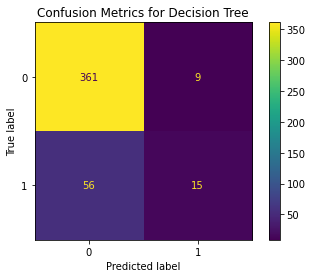

In [106]:
#Confusion Metrics for Decision Tree
metrics.plot_confusion_matrix(dtree,X_test, y_test )
plt.title('Confusion Metrics for Decision Tree')

In [107]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test,y_pred_dt))
print('Precision:', metrics.precision_score(y_test,y_pred_dt))
print('Recall:', metrics.recall_score(y_test,y_pred_dt))
print('F1 Score:', metrics.f1_score(y_test,y_pred_dt))

Accuracy: 0.8526077097505669
Precision: 0.625
Recall: 0.2112676056338028
F1 Score: 0.3157894736842105


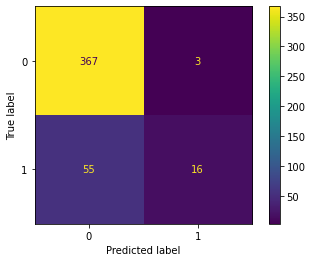

In [108]:
#Confusion Metrics fro Random Forest
metrics.plot_confusion_matrix(rf, X_test, y_test)

In [109]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test,y_pred_rf))
print('Precision:', metrics.precision_score(y_test,y_pred_rf))
print('Recall:', metrics.recall_score(y_test,y_pred_rf))
print('F1 Score:', metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8684807256235828
Precision: 0.8421052631578947
Recall: 0.22535211267605634
F1 Score: 0.35555555555555557


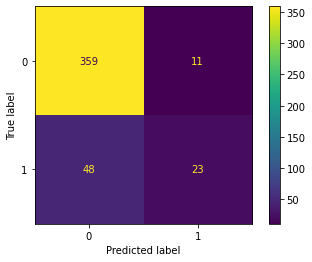

In [110]:
#Confusion Metrics for GBM
metrics.plot_confusion_matrix(gbm, X_test, y_test)

In [111]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test,y_pred_gbm))
print('Precision:', metrics.precision_score(y_test,y_pred_gbm))
print('Recall:', metrics.recall_score(y_test,y_pred_gbm))
print('F1 Score:', metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.8662131519274376
Precision: 0.6764705882352942
Recall: 0.323943661971831
F1 Score: 0.43809523809523815


Index(['MonthlyIncome', 'OverTime_Yes', 'TotalWorkingYears',
       'MaritalStatus_Single', 'YearsAtCompany', 'StockOptionLevel_1',
       'BusinessTravel_Travel_Frequently', 'JobSatisfaction_4',
       'JobRole_Laboratory Technician', 'YearsInCurrentRole'],
      dtype='object')

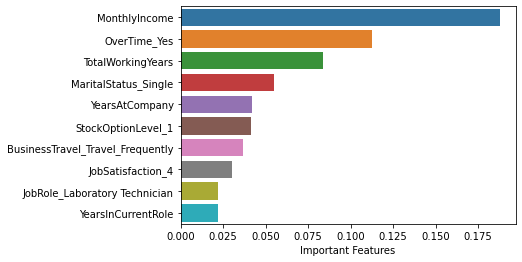

In [112]:
#Plot important Features of data
imp_features = pd.DataFrame(gbm.feature_importances_, index=X_train.columns, 
             columns=['Important Features']).sort_values(by='Important Features', ascending=False)
top_10_imp_features = imp_features.iloc[:10]
sns.barplot(x='Important Features', data=top_10_imp_features, y=top_10_imp_features.index)
top_10_imp_features.index
#Following are the top 10 features where organization should look into it for employee attrition

In [123]:
#Probability Decile Analysis

In [135]:
y_pred_prob = gbm.predict_proba(x_all)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_gbm']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_gbm')['Target'].agg(['count','mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)

sorted_rank_df=rank_df_actuals.sort_values(by='P_Rank_gbm',ascending=False)
sorted_rank_df['N_events']=rank_df_actuals['count']*rank_df_actuals['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_gbm,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Decile,Lift_over_Avg
0,10,147,0.945578,139.0,139.0,0.586498,0.586498,8.0,8.0,0.006488,0.006488,0.5800,1,5.864979
1,9,147,0.421769,62.0,201.0,0.261603,0.848101,85.0,93.0,0.068938,0.075426,0.7727,2,2.616034
2,8,147,0.095238,14.0,215.0,0.059072,0.907173,133.0,226.0,0.107867,0.183293,0.7239,3,0.590717
3,7,147,0.040816,6.0,221.0,0.025316,0.932489,141.0,367.0,0.114355,0.297648,0.6348,4,0.253165
4,6,147,0.061224,9.0,230.0,0.037975,0.970464,138.0,505.0,0.111922,0.409570,0.5609,5,0.379747
5,5,147,0.020408,3.0,233.0,0.012658,0.983122,144.0,649.0,0.116788,0.526358,0.4568,6,0.126582
6,4,147,0.000000,0.0,233.0,0.000000,0.983122,147.0,796.0,0.119221,0.645580,0.3375,7,0.000000
7,3,147,0.006803,1.0,234.0,0.004219,0.987342,146.0,942.0,0.118410,0.763990,0.2234,8,0.042194
8,2,147,0.020408,3.0,237.0,0.012658,1.000000,144.0,1086.0,0.116788,0.880779,0.1192,9,0.126582
9,1,147,0.000000,0.0,237.0,0.000000,1.000000,147.0,1233.0,0.119221,1.000000,0.0000,10,0.000000


<AxesSubplot:title={'center':'Gains Chart'}, xlabel='Decile', ylabel='cum_event_cap'>

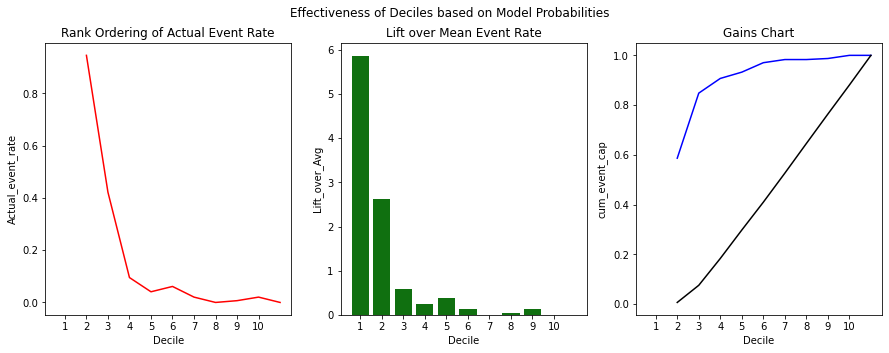

In [136]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0],  x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_non_event_cap", data=sorted_reindexed,color='black')

In [137]:
# Audience
df['Predicted_cancel_Rank']=np.where(df['P_Rank_gbm']<8,"Bottom7","Top3")
df.Predicted_cancel_Rank.value_counts()

Bottom7    1029
Top3        441
Name: Predicted_cancel_Rank, dtype: int64

In [139]:
df_top3=df.loc[df['Predicted_cancel_Rank']=='Top3',:]
df_top3.shape

(441, 37)

In [140]:
df_top3['income_RANK']=pd.qcut(df_top3['MonthlyIncome'].rank(method='first').values,10,duplicates='drop').codes+1

In [141]:
df_top3.groupby('income_RANK')['MonthlyIncome'].agg(['min','mean','max'])

,min,mean,max
income_RANK,,,
1,1009,1675.488889,2088
2,2090,2247.909091,2351
3,2356,2447.159091,2566
4,2579,2704.727273,2851
5,2853,3104.113636,3447
6,3464,4024.727273,4487
7,4508,4888.863636,5405
8,5405,6071.772727,6796
9,6815,8436.500000,9888


In [142]:
df_top3.MonthlyIncome.mean()

4829.321995464853

In [143]:
df_top3['income_segment']=np.where(df_top3['income_RANK']>=8,"High Income","Low Income")
df_top3.income_segment.value_counts()

Low Income     309
High Income    132
Name: income_segment, dtype: int64

In [144]:
df_top3['tot_work_exp_rank']=pd.qcut(df_top3['TotalWorkingYears'].rank(method='first').values,10,duplicates='drop').codes+1

In [145]:
df_top3.groupby('tot_work_exp_rank')['TotalWorkingYears'].agg(['min','mean','max'])

,min,mean,max
tot_work_exp_rank,,,
1,0,0.800000,1
2,1,1.363636,3
3,3,3.795455,5
4,5,5.386364,6
5,6,6.386364,7
6,7,7.681818,8
7,8,9.386364,10
8,10,10.227273,11
9,11,14.204545,17


In [146]:
df_top3.TotalWorkingYears.mean()

8.35827664399093

In [147]:
df_top3['Work_Exp_Segment']=np.where(df_top3['tot_work_exp_rank']>=7,"High Work Exp","Low Work Exp")
df_top3.Work_Exp_Segment.value_counts()

Low Work Exp     265
High Work Exp    176
Name: Work_Exp_Segment, dtype: int64

In [148]:
pd.crosstab(index=df_top3['Work_Exp_Segment'], columns=df_top3['income_segment'],values=df_top3['TotalWorkingYears'],aggfunc='count')

income_segment,High Income,Low Income
Work_Exp_Segment,,
High Work Exp,109,67
Low Work Exp,23,242


In [149]:
pd.crosstab(index=df_top3['Work_Exp_Segment'], columns=df_top3['income_segment'],values=df_top3['y_pred_P'],aggfunc='mean')

income_segment,High Income,Low Income
Work_Exp_Segment,,
High Work Exp,0.376801,0.384105
Low Work Exp,0.492266,0.457442
